In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [4]:
out=pt.import_excel(r'../ArcPL_Dec2022.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=((eq_tests['Delta_EnFs_Mollo13']<0.05)
        &(eq_tests['Delta_Kd_Put2008']<0.08) 
        &(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))
         &(cpx_Glass['N_meas_Cpx']>=5)
         & (cpx_Glass['H2O_Liq']>0)
        
        )

xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]

## Masked Cpxs and Glasses
x_T_K_Mask=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)
x_P_kbar_Mask=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)

Cpx_Mask=myCpxs1.loc[Press_new&Eq_Mask].reset_index(drop=True)
Liq_Mask=myLiquids1.loc[Press_new&Eq_Mask].reset_index(drop=True)
cpx_Glass_Mask=cpx_Glass.loc[Press_new&Eq_Mask].reset_index(drop=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\AppData\Local\Temp\ipykernel_10816\3568772093.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## jorgenson stuff - as diff experiments

In [5]:
InJorg=(cpx_Glass_Mask['Citation_x'].str.contains('Kraw2013')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005')   
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Feig2010')   
        
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Nandekar2014_notinLEPR')   

    |
     cpx_Glass_Mask['Citation_x'].str.contains('Melekhova2015_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Ulmer2018')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Almeev2013')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Parat2014_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR')      

       
       )

cpx_Glass_Mask_Jorg=cpx_Glass_Mask.loc[~InJorg].reset_index(drop=True)
Cpx_Mask_Jorg=Cpx_Mask.loc[~InJorg].reset_index(drop=True)
Liq_Mask_Jorg=Liq_Mask.loc[~InJorg].reset_index(drop=True)
x_P_kbar_Mask_Jorg=x_P_kbar_Mask.loc[~InJorg].reset_index(drop=True)
x_T_Mask_Jorg=x_T_K_Mask.loc[~InJorg].reset_index(drop=True)



CalcJorg=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_Mask_Jorg, liq_comps=Liq_Mask_Jorg,
                                         equationP="P_Jorgenson2022_Cpx_Liq",
                                         equationT="T_Jorgenson2022_Cpx_Liq")
CalcPetJorg=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_Mask_Jorg, liq_comps=Liq_Mask_Jorg,
                                         equationP="P_Petrelli2020_Cpx_Liq",
                                         equationT="T_Petrelli2020_Cpx_Liq")


Press_Stats_Jor=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, CalcJorg.P_kbar_calc)


Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitation

Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  

Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at you

Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Is mean or median better for jorgenson?

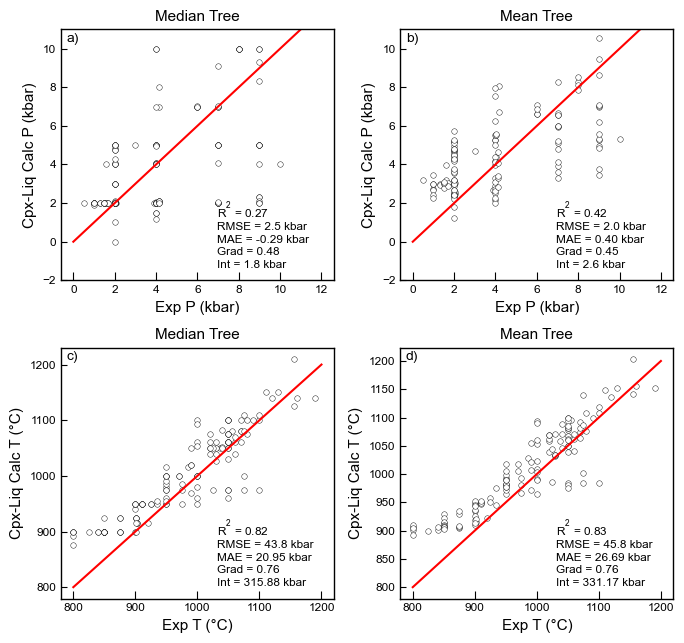

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,6.5))
ax1.set_title('Median Tree')
ax2.set_title('Mean Tree')
ax1.plot(x_P_kbar_Mask_Jorg, CalcJorg['Median_Trees_P'], 'ok', mfc='white', mew=0.3,ms=4)
ax2.plot(x_P_kbar_Mask_Jorg, CalcJorg['P_kbar_calc'], 'ok', mfc='white', mew=0.3, ms=4)
ax1.plot([0, 12], [0, 12], '-r')
ax2.plot([0, 12], [0, 12], '-r')
Jorg_P_Stats_Median=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, CalcJorg['Median_Trees_P'])
Jorg_P_Stats_Mean=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, CalcJorg['P_kbar_calc'])

ax1stats=Jorg_P_Stats_Median
ax1.annotate("R$^{2}$ = "+str(ax1stats['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("RMSE = "+str(ax1stats['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("MAE = "+str(ax1stats['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("Grad = "+str(ax1stats['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("Int = "+str(ax1stats['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)

ax2stats=Jorg_P_Stats_Mean
ax2.annotate("R$^{2}$ = "+str(ax2stats['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("RMSE = "+str(ax2stats['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("MAE = "+str(ax2stats['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("Grad = "+str(ax2stats['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("Int = "+str(ax2stats['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)
ax1.set_ylim([-2, 11])
ax2.set_ylim([-2, 11])

ax1.set_ylabel('Cpx-Liq Calc P (kbar)')
ax1.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Cpx-Liq Calc P (kbar)')
ax2.set_xlabel('Exp P (kbar)')

#### Temperature instead

ax3.set_title('Median Tree')
ax4.set_title('Mean Tree')
ax3.plot(x_T_Mask_Jorg-273.15, CalcJorg['Median_Trees_T']-273.15, 'ok', mfc='white', mew=0.3,ms=4)
ax4.plot(x_T_Mask_Jorg-273.15, CalcJorg['T_K_calc']-273.15, 'ok', mfc='white', mew=0.3, ms=4)
ax3.plot([800, 1200], [800, 1200], '-r')
ax4.plot([800, 1200], [800, 1200], '-r')
Jorg_T_Stats_Median=pt.calculate_R2_Tukey(x_T_Mask_Jorg, CalcJorg['Median_Trees_T'])
Jorg_T_Stats_Mean=pt.calculate_R2_Tukey(x_T_Mask_Jorg, CalcJorg['T_K_calc'])

ax3stats=Jorg_T_Stats_Median
ax3.annotate("R$^{2}$ = "+str(ax3stats['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("RMSE = "+str(ax3stats['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("MAE = "+str(ax3stats['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("Grad = "+str(ax3stats['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("Int = "+str(ax3stats['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)

ax4stats=Jorg_T_Stats_Mean
ax4.annotate("R$^{2}$ = "+str(ax4stats['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("RMSE = "+str(ax4stats['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("MAE = "+str(ax4stats['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("Grad = "+str(ax4stats['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("Int = "+str(ax4stats['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)
# ax3.set_ylim([-2, 11])
# ax4.set_ylim([-2, 11])

ax3.set_ylabel('Cpx-Liq Calc T (°C)')
ax3.set_xlabel('Exp T (°C)')
ax4.set_ylabel('Cpx-Liq Calc T (°C)')
ax4.set_xlabel('Exp T (°C)')
fig.tight_layout()
ax1.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax2.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax3.annotate("c)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax4.annotate("d)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
fig.savefig('Supplement_MedianvsMean_Cpx_Liq.png', dpi=300)

## IS median or mean best for petrelli et al. (2020)

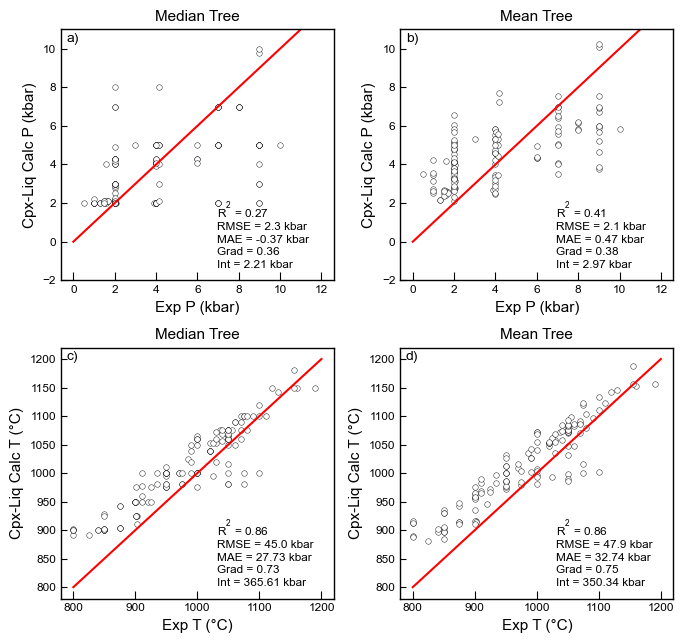

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,6.5))
ax1.set_title('Median Tree')
ax2.set_title('Mean Tree')
ax1.plot(x_P_kbar_Mask_Jorg, CalcPetJorg['Median_Trees_P'], 'ok', mfc='white', mew=0.3,ms=4)
ax2.plot(x_P_kbar_Mask_Jorg, CalcPetJorg['P_kbar_calc'], 'ok', mfc='white', mew=0.3, ms=4)
ax1.plot([0, 12], [0, 12], '-r')
ax2.plot([0, 12], [0, 12], '-r')
Jorg_P_Stats_Median=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, CalcPetJorg['Median_Trees_P'])
Jorg_P_Stats_Mean=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, CalcPetJorg['P_kbar_calc'])

ax1stats=Jorg_P_Stats_Median
ax1.annotate("R$^{2}$ = "+str(ax1stats['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("RMSE = "+str(ax1stats['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("MAE = "+str(ax1stats['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("Grad = "+str(ax1stats['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("Int = "+str(ax1stats['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)

ax2stats=Jorg_P_Stats_Mean
ax2.annotate("R$^{2}$ = "+str(ax2stats['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("RMSE = "+str(ax2stats['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("MAE = "+str(ax2stats['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("Grad = "+str(ax2stats['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("Int = "+str(ax2stats['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)
ax1.set_ylim([-2, 11])
ax2.set_ylim([-2, 11])

ax1.set_ylabel('Cpx-Liq Calc P (kbar)')
ax1.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Cpx-Liq Calc P (kbar)')
ax2.set_xlabel('Exp P (kbar)')

#### Temperature instead

ax3.set_title('Median Tree')
ax4.set_title('Mean Tree')
ax3.plot(x_T_Mask_Jorg-273.15, CalcPetJorg['Median_Trees_T']-273.15, 'ok', mfc='white', mew=0.3,ms=4)
ax4.plot(x_T_Mask_Jorg-273.15, CalcPetJorg['T_K_calc']-273.15, 'ok', mfc='white', mew=0.3, ms=4)
ax3.plot([800, 1200], [800, 1200], '-r')
ax4.plot([800, 1200], [800, 1200], '-r')
Jorg_T_Stats_Median=pt.calculate_R2_Tukey(x_T_Mask_Jorg, CalcPetJorg['Median_Trees_T'])
Jorg_T_Stats_Mean=pt.calculate_R2_Tukey(x_T_Mask_Jorg, CalcPetJorg['T_K_calc'])

ax3stats=Jorg_T_Stats_Median
ax3.annotate("R$^{2}$ = "+str(ax3stats['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("RMSE = "+str(ax3stats['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("MAE = "+str(ax3stats['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("Grad = "+str(ax3stats['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("Int = "+str(ax3stats['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)

ax4stats=Jorg_T_Stats_Mean
ax4.annotate("R$^{2}$ = "+str(ax4stats['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("RMSE = "+str(ax4stats['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("MAE = "+str(ax4stats['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("Grad = "+str(ax4stats['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("Int = "+str(ax4stats['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)
# ax3.set_ylim([-2, 11])
# ax4.set_ylim([-2, 11])

ax3.set_ylabel('Cpx-Liq Calc T (°C)')
ax3.set_xlabel('Exp T (°C)')
ax4.set_ylabel('Cpx-Liq Calc T (°C)')
ax4.set_xlabel('Exp T (°C)')
fig.tight_layout()
ax1.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax2.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax3.annotate("c)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax4.annotate("d)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
fig.savefig('Supplement_MedianvsMean_Cpx_Liq_Petrelli.png', dpi=300)

## Calculating P and T

In [10]:
Calc=pt.calculate_cpx_liq_press_all_eqs(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask)
Calc.head()

We have reset the index on Cpx and Liq comps for the Petrelli expressions
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


,"P_kbar: (P_Neave17, T_Put2008_eq33)","T_K: (P_Neave17, T_Put2008_eq33)","P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)","T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)","P_kbar: (P_Put2008_eq30, T_Put2008_eq33)","T_K: (P_Put2008_eq30, T_Put2008_eq33)","P_kbar: (P_Put2008_eq31, T_Put2008_eq33)","T_K: (P_Put2008_eq31, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)","T_K: (P_Put2008_eq32c, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2003)","T_K: (P_Put2008_eq32c, T_Put2003)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)","T_K: (P_Put2008_eq32c, T_Put2008_eq32d))","P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)","P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)","T_K: (P_Put2008_eq32c, T_Put2008_eq34))",P_kbar: (P2003 P&T),T_K: (P2003 P&T),"P_kbar: (Petrelli, 2020)","T_K: (Petrelli, 2020)","P_kbar: (Jorgeson, 2022)","T_K: (Jorgeson, 2022)","T_K: (P_Put1996_eqP1, T_Put1996_eqT2)","P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)"
0,3.286837,1383.754291,3.468250,1403.936002,2.853178,1381.515947,5.341567,1394.459212,3.923651,1387.054407,7.815784,1468.994038,9.510699,1504.676468,6.604441,7.143213,5.626683,1422.907714,3.542299,1463.188804,5.335914,1384.515455,4.684525,1381.801741,1454.834646,3.915262
1,3.086043,1401.974862,3.279286,1424.007138,2.239377,1397.496012,4.976932,1412.082043,1.480853,1393.507665,5.215677,1472.135541,5.616012,1480.563638,4.059819,4.371876,2.667050,1418.480225,4.243808,1470.805613,5.833034,1418.919091,5.266254,1425.110199,1454.371307,3.660578
2,4.021391,1413.719423,4.126892,1425.347370,3.353092,1410.122303,6.452332,1426.960191,4.825765,1418.073376,7.691297,1478.400357,9.027457,1506.530048,6.645875,7.059556,5.950759,1441.757448,4.503805,1474.010415,5.847409,1416.157273,5.255478,1408.647512,1465.100543,4.662398
3,5.858987,1424.380615,6.045046,1443.815202,4.251029,1415.626478,7.066578,1431.026566,4.820364,1418.713752,7.756938,1480.536365,8.628233,1498.879428,7.000209,7.381634,5.988356,1443.303063,5.661413,1477.639039,6.970080,1428.813636,6.564259,1425.065423,1472.635221,5.780369
4,6.662847,1427.815745,6.879102,1448.566051,5.267790,1420.177902,8.172520,1436.174201,6.463080,1426.716998,9.278533,1485.989702,9.948963,1500.104010,8.537333,8.912891,7.967743,1458.394122,6.495474,1482.115899,7.550340,1426.617273,6.653483,1428.567910,1478.291974,6.895731


## Calculating Statistics for pressure

In [11]:
Press_Stats_PN17_Teq33=pt.calculate_R2_Tukey(x_P_kbar_Mask, Calc['P_kbar: (P_Neave17, T_Put2008_eq33)']) 
Press_Stats_30_Teq33=pt.calculate_R2_Tukey(x_P_kbar_Mask, Calc['P_kbar: (P_Put2008_eq30, T_Put2008_eq33)']) 
Press_Stats_31_Teq33=pt.calculate_R2_Tukey(x_P_kbar_Mask, Calc['P_kbar: (P_Put2008_eq31, T_Put2008_eq33)']) 
Press_Stats_32c_Teq33=pt.calculate_R2_Tukey(x_P_kbar_Mask, Calc['P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)']) 
Press_Stats_32c_T2003=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                            Calc['P_kbar: (P_Put2008_eq32c, T_Put2003)']) 
Press_Stats_32c_32d=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                            Calc['P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)']) 

Press_Stats_32c_Default=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                Calc['P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)']) 
Press_Stats_32c_34=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                Calc['P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)']) 

Press_Stats_P2003=pt.calculate_R2_Tukey(x_P_kbar_Mask, Calc['P_kbar: (P2003 P&T)']) 
Press_Stats_Pet=pt.calculate_R2_Tukey(x_P_kbar_Mask, Calc['P_kbar: (Petrelli, 2020)']) 
Press_Stats_P1996_P1_T2=pt.calculate_R2_Tukey(x_P_kbar_Mask, Calc['P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)']) 
Press_Stats_34_PN17=pt.calculate_R2_Tukey(x_P_kbar_Mask, Calc['P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)']) 

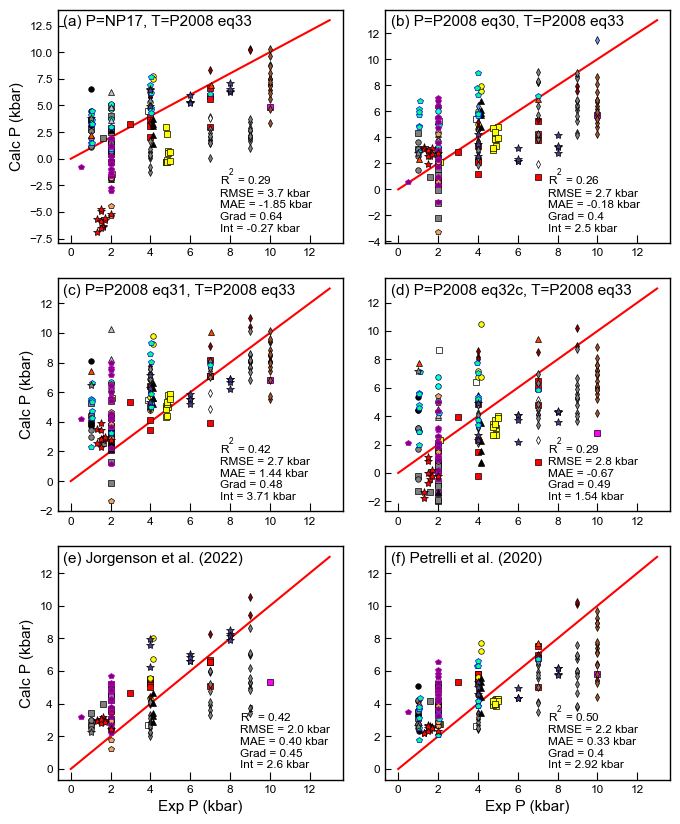

In [13]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(3,2, figsize = (7.9,10),
                                                        sharex=True) # adjust dimensions of figure here
lin_min=-0
lin_max=13


face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
## Neave and putirka, eq 33
    ax0.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## Eq30, eq 33
    
    ax1.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P_Put2008_eq30, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

 # Eq 34 - NP17   
    ax2.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P_Put2008_eq31, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Eq32c and eq33
    ax3.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
        
        # Jorg expressions
    ax4.plot(x_P_kbar_Mask_Jorg.loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             CalcJorg['P_kbar_calc'].loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    
# Petrelli et al. (2020)
    ax5.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (Petrelli, 2020)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("(a) P=NP17, T=P2008 eq33 ", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate("(b) P=P2008 eq30, T=P2008 eq33", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("(c) P=P2008 eq31, T=P2008 eq33", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("(d) P=P2008 eq32c, T=P2008 eq33", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax4.annotate("(e) Jorgenson et al. (2022)", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax5.annotate("(f) Petrelli et al. (2020)", 
             xy=(0.02, 0.93), xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3


ax0.annotate("R$^{2}$ = "+str(Press_Stats_PN17_Teq33['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax0.annotate("RMSE = "+str(Press_Stats_PN17_Teq33['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax0.annotate("MAE = "+str(Press_Stats_PN17_Teq33['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax0.annotate("Grad = "+str(Press_Stats_PN17_Teq33['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax0.annotate("Int = "+str(Press_Stats_PN17_Teq33['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)


ax1.annotate("R$^{2}$ = "+str(Press_Stats_30_Teq33['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("RMSE = "+str(Press_Stats_30_Teq33['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("MAE = "+str(Press_Stats_30_Teq33['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("Grad = "+str(Press_Stats_30_Teq33['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("Int = "+str(Press_Stats_30_Teq33['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)




ax2.annotate("R$^{2}$ = "+str(Press_Stats_31_Teq33['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("RMSE = "+str(Press_Stats_31_Teq33['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("MAE = "+str(Press_Stats_31_Teq33['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("Grad = "+str(Press_Stats_31_Teq33['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("Int = "+str(Press_Stats_31_Teq33['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)

ax3.annotate("R$^{2}$ = "+str(Press_Stats_32c_Teq33['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("RMSE = "+str(Press_Stats_32c_Teq33['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("MAE = "+str(Press_Stats_32c_Teq33['Mean Error']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=8.5)

ax3.annotate("Grad = "+str(Press_Stats_32c_Teq33['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax3.annotate("Int = "+str(Press_Stats_32c_Teq33['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)



ax4_x=0.64
ax4.annotate("R$^{2}$ = "+str(Press_Stats_Jor['R$^{2}$']),
                           xy=(ax4_x, 0.25), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("RMSE = "+str(Press_Stats_Jor['RMSE_num']) +" kbar",
                           xy=(ax4_x, 0.2), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("MAE = "+str(Press_Stats_Jor['Mean Error']) +" kbar",
                           xy=(ax4_x, 0.15), xycoords="axes fraction", fontsize=8.5)

ax4.annotate("Grad = "+str(Press_Stats_Jor['Grad']),
                           xy=(ax4_x, 0.1), xycoords="axes fraction", fontsize=8.5)
ax4.annotate("Int = "+str(Press_Stats_Jor['Int']) +" kbar",
                           xy=(ax4_x, 0.05), xycoords="axes fraction", fontsize=8.5)


ax5.annotate("R$^{2}$ = "+str(Press_Stats_Pet['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=8.5)
ax5.annotate("RMSE = "+str(Press_Stats_Pet['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=8.5)
ax5.annotate("MAE = "+str(Press_Stats_Pet['Mean Error']) +" kbar",
                           xy=(0.57, 0.150), xycoords="axes fraction", fontsize=8.5)
ax5.annotate("Grad = "+str(Press_Stats_Pet['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=8.5)
ax5.annotate("Int = "+str(Press_Stats_Pet['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=8.5)


ax1.yaxis.set_tick_params(which='both', labelbottom=True)
ax3.yaxis.set_tick_params(which='both', labelbottom=True)
ax5.yaxis.set_tick_params(which='both', labelbottom=True)
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax0.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.xaxis.set_tick_params(which='both', labelbottom=True)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

ax0.set_ylabel('Calc P (kbar)')
ax2.set_ylabel('Calc P (kbar)')
ax4.set_ylabel('Calc P (kbar)')
ax4.set_xlabel('Exp P (kbar)')
ax5.set_xlabel('Exp P (kbar)')


fig.savefig('Cpx_Liq_PRess1_Comparison_lABELLED.png', dpi=300)

## Part of Fig 8 for pressure.

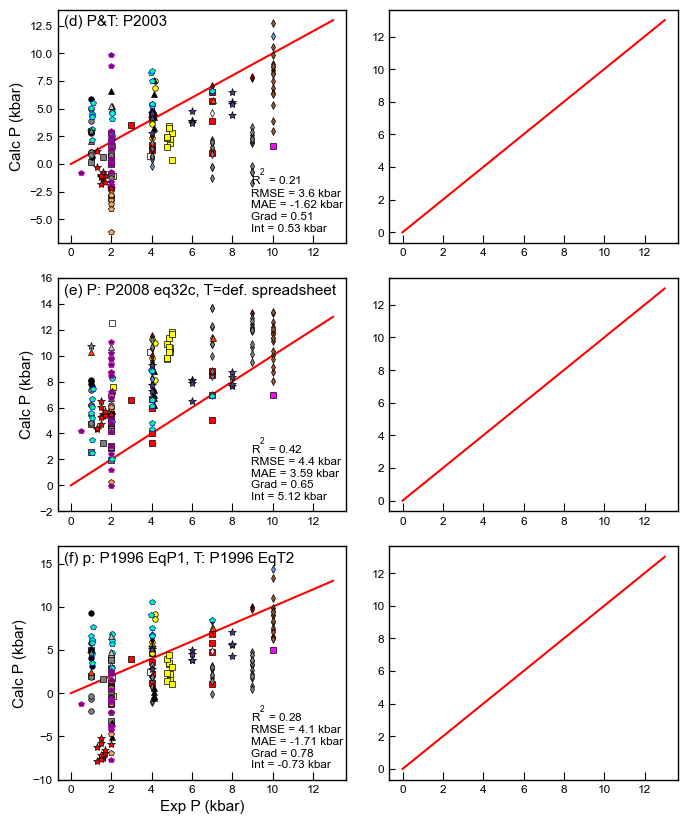

In [14]:
fig, ((ax0, ax3), (ax1, ax4), (ax2, ax5)) = plt.subplots(3,2, figsize = (8,10)) # adjust dimensions of figure here
lin_min=-0
lin_max=13


face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
    ax0.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P2003 P&T)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    ax1.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    ax2.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
    
        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33

ax0.annotate("(d) P&T: P2003", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate("(e) P: P2008 eq32c, T=def. spreadsheet", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax2.annotate("(f) p: P1996 EqP1, T: P1996 EqT2", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)

# Statistics - #############################################3
Press_Stats_eq32c_Spreadsheet=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                Calc['P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)']) 
Press_Stats_1996=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                Calc['P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)']) 

ax0_x=0.67

ax0.annotate("R$^{2}$ = "+str(Press_Stats_P2003['R$^{2}$']),
                           xy=(ax0_x, 0.25), xycoords="axes fraction", fontsize=8.5)
ax0.annotate("RMSE = "+str(Press_Stats_P2003['RMSE_num']) +" kbar",
                           xy=(ax0_x, 0.2), xycoords="axes fraction", fontsize=8.5)
ax0.annotate("MAE = "+str(Press_Stats_P2003['Mean Error']) +" kbar",
                           xy=(ax0_x, 0.15), xycoords="axes fraction", fontsize=8.5)

ax0.annotate("Grad = "+str(Press_Stats_P2003['Grad']),
                           xy=(ax0_x, 0.1), xycoords="axes fraction", fontsize=8.5)
ax0.annotate("Int = "+str(Press_Stats_P2003['Int']) +" kbar",
                           xy=(ax0_x, 0.05), xycoords="axes fraction", fontsize=8.5)

ax1_x=ax0_x
ax2_x=ax0_x
ax1.annotate("R$^{2}$ = "+str(Press_Stats_eq32c_Spreadsheet['R$^{2}$']),
                           xy=(ax1_x, 0.25), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("RMSE = "+str(Press_Stats_eq32c_Spreadsheet['RMSE_num']) +" kbar",
                           xy=(ax1_x, 0.2), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("MAE = "+str(Press_Stats_eq32c_Spreadsheet['Mean Error']) +" kbar",
                           xy=(ax1_x, 0.15), xycoords="axes fraction", fontsize=8.5)

ax1.annotate("Grad = "+str(Press_Stats_eq32c_Spreadsheet['Grad']),
                           xy=(ax1_x, 0.1), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("Int = "+str(Press_Stats_eq32c_Spreadsheet['Int']) +" kbar",
                           xy=(ax1_x, 0.05), xycoords="axes fraction", fontsize=8.5)


ax2.annotate("R$^{2}$ = "+str(Press_Stats_1996['R$^{2}$']),
                           xy=(ax2_x, 0.25), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("RMSE = "+str(Press_Stats_1996['RMSE_num']) +" kbar",
                           xy=(ax2_x, 0.2), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("MAE = "+str(Press_Stats_1996['Mean Error']) +" kbar",
                           xy=(ax2_x, 0.15), xycoords="axes fraction", fontsize=8.5)

ax2.annotate("Grad = "+str(Press_Stats_1996['Grad']),
                           xy=(ax2_x, 0.1), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("Int = "+str(Press_Stats_1996['Int']) +" kbar",
                           xy=(ax2_x, 0.05), xycoords="axes fraction", fontsize=8.5)



ax1.yaxis.set_tick_params(which='both', labelbottom=True)
ax3.yaxis.set_tick_params(which='both', labelbottom=True)
ax5.yaxis.set_tick_params(which='both', labelbottom=True)
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax0.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.xaxis.set_tick_params(which='both', labelbottom=True)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

ax1.set_ylim([-2, 16])
ax2.set_ylim([-10, 17])
ax0.set_ylabel('Calc P (kbar)')
ax1.set_ylabel('Calc P (kbar)')
ax2.set_ylabel('Calc P (kbar)')
ax2.set_xlabel('Exp P (kbar)')
fig.savefig('Cpx_Liq_PRess2.png', dpi=300)

## Default ways of using Eq32c

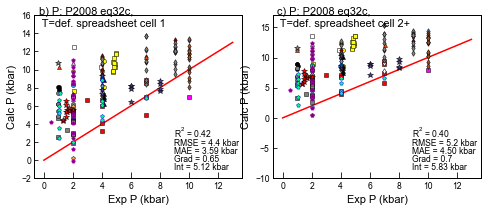

In [19]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize = (8,3)) # adjust dimensions of figure here
lin_min=-0
lin_max=13


face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  

    ax1.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    ax2.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
    
        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33


ax1.annotate("b) P: P2008 eq32c, \n T=def. spreadsheet cell 1", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax2.annotate("c) P: P2008 eq32c, \n T=def. spreadsheet cell 2+", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)

# Statistics - #############################################3
Press_Stats_eq32c_Spreadsheet=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                Calc['P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)']) 
Press_Stats_eq32c_Spreadsheet2=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                Calc['P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)']) 

ax1_x=ax0_x
ax2_x=ax0_x
ax1.annotate("R$^{2}$ = "+str(Press_Stats_eq32c_Spreadsheet['R$^{2}$']),
                           xy=(ax1_x, 0.25), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("RMSE = "+str(Press_Stats_eq32c_Spreadsheet['RMSE_num']) +" kbar",
                           xy=(ax1_x, 0.2), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("MAE = "+str(Press_Stats_eq32c_Spreadsheet['Mean Error']) +" kbar",
                           xy=(ax1_x, 0.15), xycoords="axes fraction", fontsize=8.5)

ax1.annotate("Grad = "+str(Press_Stats_eq32c_Spreadsheet['Grad']),
                           xy=(ax1_x, 0.1), xycoords="axes fraction", fontsize=8.5)
ax1.annotate("Int = "+str(Press_Stats_eq32c_Spreadsheet['Int']) +" kbar",
                           xy=(ax1_x, 0.05), xycoords="axes fraction", fontsize=8.5)

ax2.annotate("R$^{2}$ = "+str(Press_Stats_eq32c_Spreadsheet2['R$^{2}$']),
                           xy=(ax1_x, 0.25), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("RMSE = "+str(Press_Stats_eq32c_Spreadsheet2['RMSE_num']) +" kbar",
                           xy=(ax1_x, 0.2), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("MAE = "+str(Press_Stats_eq32c_Spreadsheet2['Mean Error']) +" kbar",
                           xy=(ax1_x, 0.15), xycoords="axes fraction", fontsize=8.5)

ax2.annotate("Grad = "+str(Press_Stats_eq32c_Spreadsheet2['Grad']),
                           xy=(ax1_x, 0.1), xycoords="axes fraction", fontsize=8.5)
ax2.annotate("Int = "+str(Press_Stats_eq32c_Spreadsheet2['Int']) +" kbar",
                           xy=(ax1_x, 0.05), xycoords="axes fraction", fontsize=8.5)


ax2.yaxis.set_tick_params(which='both', labelbottom=True)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

ax1.set_ylim([-2, 16])
ax2.set_ylim([-10, 17])
ax1.set_ylabel('Calc P (kbar)')
ax2.set_ylabel('Calc P (kbar)')
ax2.set_xlabel('Exp P (kbar)')
ax1.set_xlabel('Exp P (kbar)')

fig.savefig('Cpx_Liq_PRess_DefaultSp.png', dpi=300)